# TN Motor Vehicle Registrations
- Acquired from TN Department of Revenue by [records request](https://www.tn.gov/revenue/about-us/contact-us/public-records-request.html) under Tennessee Public Records Act
- Notes:
    - Requested registration years 2018-2022

## Environment

In [1]:
# packages
import numpy as np
import pandas as pd
import time
import pyarrow

## Data Load

In [2]:
# ohio mvr data
# note: 2.2% of records from original csv dropped due to comma issues
df = pd.read_parquet('data/oh_mvr_2018-2022.parquet', engine='pyarrow')

print(df.shape)
print('df obs: ',f"{df.shape[0]:,d}")

(28514271, 24)
df obs:  28,514,271


In [3]:
df.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28514271 entries, 0 to 28514270
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   title_id               int64         
 1   title_issue_date       datetime64[ns]
 2   title_status           category      
 3   title_type             category      
 4   vin                    object        
 5   model_year             int64         
 6   make                   object        
 7   model                  object        
 8   vehicle_type           category      
 9   new_used               category      
 10  mileage                object        
 11  mileage_brand          category      
 12  mileage_justification  category      
 13  nmvtis_brand1          category      
 14  nmvtis_brand2          category      
 15  nmvtis_brand3          category      
 16  purchase_date          datetime64[ns]
 17  price                  float64       
 18  owner_type          

## Basic Data Info

In [4]:
df.nunique()

title_id                 28514271
title_issue_date             1548
title_status                    3
title_type                      6
vin                      13404952
model_year                    132
make                         4620
model                      153805
vehicle_type                   77
new_used                        2
mileage                    400895
mileage_brand                   4
mileage_justification           5
nmvtis_brand1                  35
nmvtis_brand2                  35
nmvtis_brand3                  35
purchase_date               14713
price                     1807122
owner_type                      5
owner_name                  14120
prev_owner_type                 5
prev_owner_name             20749
county                         88
prev_state                     64
dtype: int64

In [22]:
# data sample
df.sample(10).T

,5824340,390163,19073951,2972341,8955249,26785245,4628735,9668144,1231646,21690817
title_id,2514696076,2516386904,7605151920,6200541624,5203275492,4502784684,6702127660,8303042214,4304069518,8303153891
title_issue_date,2018-03-01 00:00:00,2021-04-05 00:00:00,2020-03-04 00:00:00,2021-01-22 00:00:00,2021-05-27 00:00:00,2020-11-10 00:00:00,2018-07-20 00:00:00,2021-06-07 00:00:00,2021-04-15 00:00:00,2022-03-22 00:00:00
title_status,INACTIVE,INACTIVE,ACTIVE,ACTIVE,ACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE
title_type,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL
vin,KNADC125746353374,1FTKR4EE7BPA55761,1FBNE3BL9EDA97798,1FTFW1EF8BKE10242,1FTEX1EW9AKB59254,1G6KD57936U151899,1D4GP24R65B211975,1HGEJ8140TL067303,1G1ZD5ST9JF111394,5TDYZ3DC0HS836267
model_year,2004,2011,2014,2011,2010,2006,2005,1996,2018,2017
make,KIA MOTORS CORP,FORD,FORD,FORD,FORD,CADILLAC,DODGE,HONDA,CHEVROLET,TOYOTA MOTOR CO
model,RIO,RANGER,ECONOLINE WAGON,F150,F150,DTS,CARAVAN,CIVIC,MALIBU,SIENNA
vehicle_type,FOUR DOOR,PICKUP TRUCK,STATION WAGON,PICKUP TRUCK,PICKUP TRUCK,FOUR DOOR,STATION WAGON,TWO DOOR,FOUR DOOR,STATION WAGON
new_used,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used


In [6]:
# numeric
df.describe().round(decimals = 1)

,title_id,model_year,price
count,2.851427e+07,28514271.0,2.851427e+07
mean,4.254524e+09,2010.8,1.152310e+04
std,2.455155e+09,8.6,9.999908e+05
min,1.004097e+08,1827.0,0.000000e+00
25%,2.101949e+09,2006.0,0.000000e+00
50%,4.303895e+09,2012.0,5.000000e+02
75%,6.600466e+09,2017.0,1.777300e+04
max,8.800273e+09,2024.0,3.682638e+09


In [7]:
# non-numeric
df.describe(include = ['object','category']).T

,count,unique,top,freq
title_status,28514271,3,INACTIVE,18155197
title_type,28514271,6,ORIGINAL,22838419
vin,28514271,13404952,JTKDE177060142510,28
make,28514271,4620,CHEVROLET,4574298
model,28512101,153805,--,1477603
vehicle_type,28514271,77,STATION WAGON,9781339
new_used,28514269,2,Used,24166073
mileage,26935318,400895,10,340575
mileage_brand,26973796,4,ACTUAL,26153111
mileage_justification,1578954,5,ODOMETER EXEMPT,1044237


In [8]:
# dates
df.describe(include = ['datetime'], datetime_is_numeric=True)

,title_issue_date,purchase_date
count,28514271,28514269
mean,2020-06-14 21:15:13.905617664,2019-11-03 18:40:00.591535872
min,2018-01-02 00:00:00,1900-01-09 00:00:00
25%,2019-03-19 00:00:00,2018-10-21 00:00:00
50%,2020-06-29 00:00:00,2020-02-14 00:00:00
75%,2021-08-31 00:00:00,2021-06-17 00:00:00
max,2022-12-31 00:00:00,2022-12-31 00:00:00


## Filter Used Autos and Trucks

In [12]:
df[df['vehicle_type'] == 'GOLF CART']

,title_id,title_issue_date,title_status,title_type,vin,model_year,make,model,vehicle_type,new_used,...,nmvtis_brand2,nmvtis_brand3,purchase_date,price,owner_type,owner_name,prev_owner_type,prev_owner_name,county,prev_state
88604,7001792985,2019-06-27,ACTIVE,DUPLICATE,020,1996,COLUM,GCT,GOLF CART,Used,...,NaN,NaN,2006-12-19,1000.00,COMPANY,None,INDIVIDUAL,None,OTTAWA,OH
340327,3300354163,2019-06-07,INACTIVE,DUPLICATE,AG0624637114,2006,CLUB CAR,---,GOLF CART,Used,...,NaN,NaN,2012-11-15,5500.00,INDIVIDUAL,None,COMPANY,None,HARDIN,OH
459596,3600580291,2018-08-31,INACTIVE,DUPLICATE,1073649,1998,E Z GO,B07,GOLF CART,Used,...,NaN,NaN,2010-06-22,1750.00,INDIVIDUAL,None,COMPANY,None,ROSS,OH
476635,2200877434,2019-06-10,INACTIVE,DUPLICATE,1229141,2003,E Z GO,-,GOLF CART,Used,...,NaN,NaN,2016-04-22,1200.00,INDIVIDUAL,None,COMPANY,None,ERIE,OH
553698,1812670235,2019-06-11,ACTIVE,DUPLICATE,00000000003148635,2015,E Z GO,S4 EXPRESS,GOLF CART,Used,...,NaN,NaN,2016-05-14,7250.00,INDIVIDUAL,None,VENDOR,MIDWAY GOLF CARTS,CUYAHOGA,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27392055,1814123989,2022-09-22,INACTIVE,DUPLICATE,1399202,2001,E Z GO,TXT,GOLF CART,Used,...,NaN,NaN,2015-05-31,1000.00,INDIVIDUAL,None,INDIVIDUAL,None,CUYAHOGA,OH
28141864,3600620981,2021-01-05,ACTIVE,DUPLICATE,1073649,1998,E Z GO,B07,GOLF CART,Used,...,NaN,NaN,2010-06-22,1750.00,INDIVIDUAL,None,COMPANY,None,ROSS,OH
28282361,7901721714,2021-01-07,INACTIVE,DUPLICATE,2539403,2007,E Z GO,POS,GOLF CART,Used,...,NaN,NaN,2015-05-14,5807.96,INDIVIDUAL,None,COMPANY,None,TUSCARAWAS,OH
28311627,1100523230,2022-10-25,INACTIVE,DUPLICATE,2261628,2003,E Z GO,--,GOLF CART,Used,...,NaN,NaN,2015-08-31,0.00,INDIVIDUAL,None,INDIVIDUAL,None,LICKING,OH


In [13]:
# vehicle types
#pd.options.display.max_rows = 100
print(df['vehicle_type'].value_counts(dropna=False))

STATION WAGON       9781339
FOUR DOOR           8695912
PICKUP TRUCK        3970503
TWO DOOR            1078623
HATCHBACK            943357
                     ...   
4 PASS LOW SPEED          2
COMPANY                   1
Off Road                  1
INDIVIDUAL                1
2 PASS LOW SPEED          1
Name: vehicle_type, Length: 77, dtype: int64


In [14]:
# filter to auto/truck only (for now, before listing match)

types_selection = ['STATION WAGON','FOUR DOOR','PICKUP TRUCK','TWO DOOR','HATCHBACK',
    'TRUCK','VAN','UTILITY CAR','PASSENGER VAN','CONVERTIBLE','CRUISER',
    'SPORT','UTILITY VEHICLE','SPORT TRUCK','TRADITIONAL','ROAD/STREET',
    'FLATBED','THREE DOOR','PICKUP']

print(f'all obs: {df.shape[0]:,d}')

# drop vehicles not in types_selection
df.drop(df[~df['vehicle_type'].isin(types_selection)].index, inplace=True)

print(f'auto/truck only obs: {df.shape[0]:,d}')

all obs: 28,514,271
auto/truck only obs: 27,065,324


In [15]:
# new / used
print(df['new_used'].value_counts(dropna=False))

Used    23124461
New      3940863
Name: new_used, dtype: int64


In [16]:
# filter to used only

print(f'all obs: {df.shape[0]:,d}')

# drop new vehicles
df.drop(df[df['new_used'] == 'New'].index, inplace=True)

print(f'used only obs: {df.shape[0]:,d}')


all obs: 27,065,324
used only obs: 23,124,461


## VINs

Ohio is a state where a vehicle must be titled at every exchange. A vehicle may be traded amongst dealerships multiple times before final purchase by a consumer.

In [17]:
print('obs: {0:,d}'.format(df.shape[0]))
print('unique vins: {0:,d}'.format(df['vin'].unique().shape[0]))

obs: 23,124,461
unique vins: 10,087,801


In [28]:
pd.options.display.max_rows = 50
top_vins = df['vin'].value_counts().head(50).index

In [29]:
pd.options.display.max_rows = 500
df[df['vin'].isin(top_vins)].sort_values(by=['vin','title_issue_date']).T

,8425317,10795879,3847570,4396949,4397414,17547900,17628340,17617430,18958140,20630061,...,26642583,26642816,26870551,1963388,1963912,2368146,8523089,16218369,19449601,28403868
title_id,1501506862,5003675192,4101006621,4101007354,4101007357,4101028585,4101028730,4101028944,4101031857,4101036486,...,3109042781,3109042785,3109047177,3109145779,3109145788,3109149732,3109164442,3109244366,3109301995,3109477451
title_issue_date,2018-10-24 00:00:00,2018-12-03 00:00:00,2019-04-16 00:00:00,2019-04-24 00:00:00,2019-04-24 00:00:00,2020-01-13 00:00:00,2020-01-15 00:00:00,2020-01-17 00:00:00,2020-02-28 00:00:00,2020-05-19 00:00:00,...,2020-11-06 00:00:00,2020-11-06 00:00:00,2020-11-16 00:00:00,2021-04-27 00:00:00,2021-04-27 00:00:00,2021-05-03 00:00:00,2021-05-21 00:00:00,2021-09-20 00:00:00,2021-12-30 00:00:00,2022-10-28 00:00:00
title_status,INACTIVE,INACTIVE,INACTIVE,VOID,INACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE,...,INACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE,ACTIVE
title_type,REPLACEMENT,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,DUPLICATE,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,...,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,DUPLICATE,ORIGINAL,SALVAGE
vin,1D7HA16K43J534332,1D7HA16K43J534332,1D7HA16K43J534332,1D7HA16K43J534332,1D7HA16K43J534332,1D7HA16K43J534332,1D7HA16K43J534332,1D7HA16K43J534332,1D7HA16K43J534332,1D7HA16K43J534332,...,KNAFE221095617442,KNAFE221095617442,KNAFE221095617442,KNAFE221095617442,KNAFE221095617442,KNAFE221095617442,KNAFE221095617442,KNAFE221095617442,KNAFE221095617442,KNAFE221095617442
model_year,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,...,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009
make,DODGE,DODGE,DODGE,DODGE,DODGE,DODGE,DODGE,DODGE,DODGE,DODGE,...,KIA MOTORS CORP,KIA MOTORS CORP,KIA MOTORS CORP,KIA MOTORS CORP,KIA MOTORS CORP,KIA MOTORS CORP,KIA MOTORS CORP,KIA MOTORS CORP,KIA MOTORS CORP,KIA MOTORS CORP
model,RAM 1500,RAM 1500,RAM 1500,RAM 1500,RAM 1500,RAM 1500,RAM 1500,RAM 1500,RAM 1500,RAM 1500,...,SPECTRA,SPECTRA,SPECTRA,SPECTRA,SPECTRA,SPECTRA,SPECTRA,SPECTRA,SPECTRA,SPECTRA
vehicle_type,PICKUP TRUCK,PICKUP TRUCK,PICKUP TRUCK,PICKUP TRUCK,PICKUP TRUCK,PICKUP TRUCK,PICKUP TRUCK,PICKUP TRUCK,PICKUP TRUCK,PICKUP TRUCK,...,FOUR DOOR,FOUR DOOR,FOUR DOOR,FOUR DOOR,FOUR DOOR,FOUR DOOR,FOUR DOOR,FOUR DOOR,FOUR DOOR,FOUR DOOR
new_used,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used,...,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used


## Prices

Have got some price issues
- Lots of missing with 0 filler
- Very high values

In [18]:
num = df.shape[0]
print('total obs: ',f"{num:,d}")

num = (df['price'] < 0.1).sum()
print('0 prices: ',f"{num:,d}")

num = (df['price'] > 10000).sum()
print('prices > 10,000: ',f"{num:,d}")

num = ((df['price'] > 0.1) & (df['price'] < 10000)).sum()
print('prices between: ',f"{num:,d}")

total obs:  23,124,461
0 prices:  11,948,523
prices > 10,000:  5,133,806
prices between:  6,003,119


<AxesSubplot:>

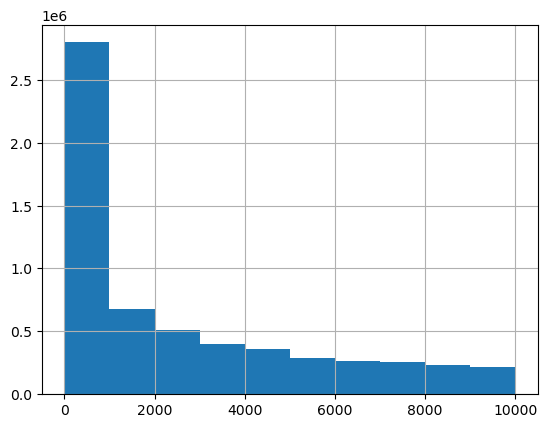

In [19]:
# hist prices between $0.1 and $10,000
df[((df['price'] > 0.1) & (df['price'] < 10000))]['price'].hist()

### High Prices

In [20]:
pd.set_option('display.max_rows', 100)

In [21]:
df.sort_values(by='price', ascending=False).head(50).reset_index()

,index,title_id,title_issue_date,title_status,title_type,vin,model_year,make,model,vehicle_type,...,nmvtis_brand2,nmvtis_brand3,purchase_date,price,owner_type,owner_name,prev_owner_type,prev_owner_name,county,prev_state
0,19108015,3500329699,2020-03-04,VOID,ORIGINAL,3C6UR5NL2EG314332,2014,RAM,2500,PICKUP TRUCK,...,NaN,NaN,2020-02-01,3.682638e+09,INDIVIDUAL,None,COMPANY,None,HENRY,GA
1,19181923,3500329730,2020-03-05,VOID,REPLACEMENT,3C6UR5NL2EG314332,2014,RAM,2500,PICKUP TRUCK,...,NaN,NaN,2020-02-01,3.682638e+09,INDIVIDUAL,None,COMPANY,None,HENRY,OH
2,18432837,3108880036,2020-02-13,INACTIVE,ORIGINAL,1FTEW1E59KFB36531,2019,FORD,F150,PICKUP TRUCK,...,NaN,NaN,2020-01-31,2.897203e+08,INDIVIDUAL,None,DEALER,CARMAX AUTO SUPERSTORES INC,HAMILTON,OH
3,10449701,4703569036,2018-11-27,INACTIVE,SALVAGE,2G1FP22S1S2211895,1995,CHEVROLET,CAMARO,TWO DOOR,...,NaN,NaN,2018-11-26,1.126202e+08,COMPANY,None,INDIVIDUAL,None,LORAIN,OH
4,2100935,4806060699,2021-04-28,INACTIVE,ORIGINAL,1FUJGLD53GLGP2372,2016,FREIGHTLINER CO,CASCADIA 125,TRUCK,...,NaN,NaN,2021-04-04,8.200000e+07,DEALER,TOLEDO TRUCK SALES INC,COMPANY,None,HARDIN,XX
5,16759867,8000971817,2021-10-01,INACTIVE,ORIGINAL,1FM5K8HT3GGB59198,2016,FORD,EXPLORER,STATION WAGON,...,NaN,NaN,2021-10-01,5.700000e+07,INDIVIDUAL,None,INDIVIDUAL,None,FRANKLIN,FL
6,15179678,5003788671,2019-11-13,VOID,ORIGINAL,1FUJGLDR5DLBK8423,2013,FREIGHTLINER CO,CASCADIA 125,TRUCK,...,NaN,NaN,2019-11-08,4.373500e+07,INDIVIDUAL,None,DEALER,FYDA FREIGHTLINER YOUNGSTOWN INC,MAHONING,OH
7,12235579,906136850,2022-11-17,INACTIVE,ORIGINAL,SALVR2RX0JH273488,2018,LAND ROVER,RANGE ROVER EVOQUE,STATION WAGON,...,NaN,NaN,2022-10-22,3.614500e+07,INDIVIDUAL,None,DEALER,LUXURY MOTOR CAR COMPANY,HAMILTON,OH
8,18571140,4703767437,2020-02-18,INACTIVE,ORIGINAL,1FTYE2YM2KKA96745,2019,FORD,TRANSIT,VAN,...,NaN,NaN,2020-02-18,3.591536e+07,DEALER,GELCO FLEET TRUST,COMPANY,None,LORAIN,MA
9,994995,6900353317,2018-09-10,INACTIVE,ORIGINAL,2GNAXJEV3J6282130,2018,CHEVROLET,EQUINOX,STATION WAGON,...,NaN,NaN,2018-09-03,2.913440e+07,DEALER,ACAR LEASING LTD,DEALER,CHEVROLET OF OTTAWA,PUTNAM,OH


<AxesSubplot:>

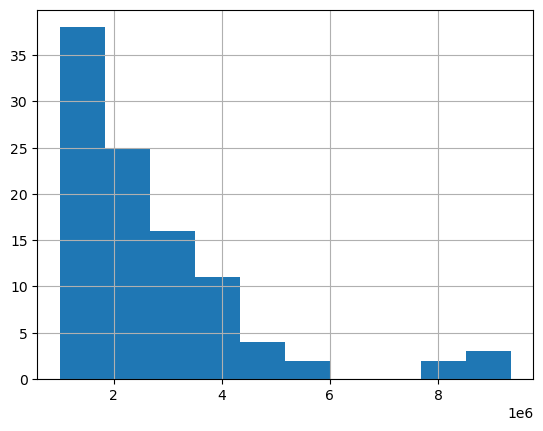

In [ ]:
# between $1m and $10m
condition_low = df['price'] > 1000000
condition_high = df['price'] < 10000000
df[condition_low & condition_high]['price'].hist()

I suspect some counties are adding zeros for decimal

- 1m = $10,000.00
- 10m = $100,000.00

### Distributions by County

In [20]:
# mean prices by county

nums = df.groupby('county')['price'].mean().sort_values(ascending=False)
index = nums.index

for i in range(len(nums)):
    print("{}: ${:0,.2f}".format(index[i],nums[i]))

Sumner: $65,039,780.00
Unicoi: $42,629,816.00
Greene: $21,020,718.00
Rhea: $19,698,620.00
Williamson: $5,504,215.00
Madison: $5,126,476.50
Shelby: $5,018,479.00
Davidson: $313,903.78
Knox: $12,465.07
Fayette: $11,335.27
Dyer: $10,279.17
Tipton: $10,272.22
Henry: $9,804.82
Gibson: $9,804.49
Henderson: $9,434.28
Anderson: $9,425.70
Washington: $9,416.22
Bedford: $9,312.57
Hardin: $9,252.50
Hardeman: $9,195.68
Roane: $8,739.39
Crockett: $8,098.24
Lauderdale: $8,063.53
Cheatham: $7,803.85
Carroll: $7,603.21
McNairy: $7,214.13
Chester: $6,731.81
Wayne: $6,098.51
Houston: $6,032.91
Lake: $6,013.06
Polk: $5,872.87
Bledsoe: $5,687.14
Trousdale: $5,655.52
Dekalb: $5,611.52
Moore: $5,433.33
Humphreys: $5,300.61
Smith: $5,296.35
Macon: $5,201.29
Hamblen: $4,790.07
Meigs: $4,540.94
Johnson: $4,518.95
Claiborne: $4,495.70
Fentress: $4,337.81
Jackson: $4,280.34
Van Buren: $4,279.90
Campbell: $4,214.69
Clay: $4,174.17
Pickett: $3,870.86
Hickman: $3,597.12
Carter: $3,503.78
Loudon: $3,429.89
Lincoln: 

In [19]:
# median prices by county

nums = df.groupby('county')['price'].median().sort_values(ascending=False)
index = nums.index

for i in range(len(nums)):
    print("{}: ${:0,.2f}".format(index[i],nums[i]))

Fayette: $3,290.85
Gibson: $3,000.00
Dyer: $3,000.00
Tipton: $3,000.00
Hardeman: $2,500.00
Henry: $2,500.00
Bedford: $2,500.00
Crockett: $2,361.00
Lauderdale: $2,099.50
Madison: $2,000.00
Hardin: $2,000.00
Washington: $2,000.00
McNairy: $1,650.00
Henderson: $1,500.00
Carroll: $1,500.00
Unicoi: $1,200.00
Trousdale: $1,000.00
Wayne: $1,000.00
Houston: $1,000.00
Humphreys: $1,000.00
Macon: $1,000.00
Moore: $1,000.00
Dekalb: $1,000.00
Cheatham: $1,000.00
Polk: $1,000.00
Roane: $1,000.00
Chester: $900.00
Lake: $800.00
Union: $700.00
Smith: $600.00
Clay: $550.00
Meigs: $500.00
Perry: $500.00
Van Buren: $500.00
Jackson: $500.00
Hickman: $500.00
Anderson: $500.00
Cannon: $500.00
Grundy: $500.00
Fentress: $500.00
Bledsoe: $500.00
Giles: $400.00
Sequatchie: $300.00
Hamblen: $300.00
Lewis: $300.00
Johnson: $300.00
Grainger: $300.00
Campbell: $250.00
Marshall: $250.00
Hancock: $200.00
McMinn: $200.00
Claiborne: $200.00
Pickett: $200.00
Carter: $200.00
Overton: $150.00
Sevier: $100.00
Morgan: $100.

In [22]:
groups = df.groupby('county')

for name, group in groups:
    print(name)
    print(group['price'].describe().round(decimals = 1))

Anderson
count       105100.0
mean          9425.7
std         308981.1
min              0.0
25%              0.0
50%            500.0
75%          13500.0
max      100000000.0
Name: price, dtype: float64
Bedford
count      63563.0
mean        9312.6
std        38302.8
min            0.0
25%          300.0
50%         2500.0
75%        13884.1
max      4521578.0
Name: price, dtype: float64
Benton
count     18526.0
mean       2338.5
std        7196.4
min           0.0
25%           0.0
50%         100.0
75%        1000.0
max      196085.0
Name: price, dtype: float64
Bledsoe
count      12038.0
mean        5687.1
std        17721.0
min            0.0
25%            0.0
50%          500.0
75%         4000.0
max      1500272.0
Name: price, dtype: float64
Blount
count    143574.0
mean       2244.5
std        8475.3
min           0.0
25%           0.0
50%           0.0
75%         600.0
max      936676.0
Name: price, dtype: float64
Bradley
count     119405.0
mean        2781.9
std        1816

## The Rest

In [19]:
# null counts
pd.DataFrame({'count':df.isna().sum()
             ,'percent':(df.isna().sum()/df.shape[0]).round(decimals=2)}
    ).sort_values(by='count', ascending=False)

,count,percent
price,323622,0.04
title_issue_date,532,0.00
purchase_date,331,0.00
model,215,0.00
vin,0,0.00
odometer_type,0,0.00
mileage,0,0.00
county,0,0.00
zip,0,0.00
model_year,0,0.00


In [20]:
# 0 or filler counts